# Análise de Energia Total - Eventos Sísmicos A001

Este notebook realiza a análise de energia total para os dados sísmicos do arquivo `eventsA001_cut25seg_results.csv`.

A energia total é calculada usando a fórmula: **E = √(x² + y² + z²)**

Onde x, y, z são as amplitudes nas respectivas direções.

## 1. Import Required Libraries

Importando as bibliotecas necessárias para análise de dados e visualização.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Load and Explore Data

Carregando e explorando a estrutura dos dados do arquivo CSV.

In [23]:
# Definir o caminho do arquivo
data_path = Path("resultados_csv/eventsA001_cut25seg_results.csv")

# Verificar se o arquivo existe
if data_path.exists():
    print(f"Arquivo encontrado: {data_path}")
else:
    print(f"Arquivo não encontrado: {data_path}")
    print("Verifique o caminho do arquivo.")

Arquivo encontrado: resultados_csv/eventsA001_cut25seg_results.csv


In [24]:
# Carregar os dados
df = pd.read_csv(data_path)

print("Dados carregados com sucesso!")
print(f"\nDimensões do dataset: {df.shape}")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dados carregados com sucesso!

Dimensões do dataset: (5353, 8)

Colunas disponíveis:
1. event_id
2. plane
3. max_magnitude
4. sensor
5. x_amplitude
6. y_amplitude
7. z_amplitude
8. source_file


In [25]:
# Visualizar as primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df.head())

print("\nInformações gerais do dataset:")
display(df.info())

Primeiras 5 linhas do dataset:


,event_id,plane,max_magnitude,sensor,x_amplitude,y_amplitude,z_amplitude,source_file
0,71355,Plano_E,0.000008,SC.MAC11.00,5.311948e-06,4.619220e-06,4.247604e-06,eventsA001_cut25seg.csv
1,71355,Plano_G,0.000005,BR.ESM09,3.382420e-06,1.842891e-06,2.549331e-06,eventsA001_cut25seg.csv
2,71355,Plano_H,0.000010,BR.ESM08,5.039811e-06,7.826915e-06,3.511332e-06,eventsA001_cut25seg.csv
3,71360,Plano_E,0.000007,SC.MAC11.00,3.822484e-06,3.903765e-06,4.685221e-06,eventsA001_cut25seg.csv
4,71360,Plano_G,0.000001,BR.ESM09,5.367241e-07,5.903165e-07,9.229594e-07,eventsA001_cut25seg.csv



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_id       5353 non-null   int64  
 1   plane          5353 non-null   object 
 2   max_magnitude  5353 non-null   float64
 3   sensor         5353 non-null   object 
 4   x_amplitude    5353 non-null   float64
 5   y_amplitude    5353 non-null   float64
 6   z_amplitude    5353 non-null   float64
 7   source_file    5353 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 334.7+ KB


None

## 3. Data Preprocessing

Limpeza e preparação dos dados para análise.

In [27]:
# Verificar valores nulos
print("Valores nulos por coluna:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

if null_counts.sum() == 0:
    print("Nenhum valor nulo encontrado!")

Valores nulos por coluna:
Series([], dtype: int64)
Nenhum valor nulo encontrado!


In [28]:
# Verificar tipos de dados das colunas de amplitude
amplitude_cols = ['x_amplitude', 'y_amplitude', 'z_amplitude']

print("Tipos de dados das colunas de amplitude:")
for col in amplitude_cols:
    print(f"{col}: {df[col].dtype}")

# Garantir que as colunas de amplitude são numéricas
for col in amplitude_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nColunas de amplitude convertidas para formato numérico.")

Tipos de dados das colunas de amplitude:
x_amplitude: float64
y_amplitude: float64
z_amplitude: float64

Colunas de amplitude convertidas para formato numérico.


## 4. Calculate Total Energy

Calculando a energia total usando a fórmula E = √(x² + y² + z²).

In [30]:
# Calcular a energia total
df['total_energy'] = np.sqrt(
    df['x_amplitude']**2 + 
    df['y_amplitude']**2 + 
    df['z_amplitude']**2
)

print("Energia total calculada com sucesso!")
print(f"\nPrimeiros valores de energia total:")
display(df[['event_id', 'plane', 'sensor', 'x_amplitude', 'y_amplitude', 'z_amplitude', 'total_energy']].head(10))

Energia total calculada com sucesso!

Primeiros valores de energia total:


,event_id,plane,sensor,x_amplitude,y_amplitude,z_amplitude,total_energy
0,71355,Plano_E,SC.MAC11.00,5.311948e-06,4.619220e-06,4.247604e-06,0.000008
1,71355,Plano_G,BR.ESM09,3.382420e-06,1.842891e-06,2.549331e-06,0.000005
2,71355,Plano_H,BR.ESM08,5.039811e-06,7.826915e-06,3.511332e-06,0.000010
3,71360,Plano_E,SC.MAC11.00,3.822484e-06,3.903765e-06,4.685221e-06,0.000007
4,71360,Plano_G,BR.ESM09,5.367241e-07,5.903165e-07,9.229594e-07,0.000001
5,71360,Plano_H,BR.ESM08,3.591352e-06,1.921477e-06,1.587709e-06,0.000004
6,71363,Plano_G,BR.ESM09,2.266679e-06,1.806780e-06,2.482763e-06,0.000004
7,71363,Plano_H,BR.ESM01,6.626277e-05,3.607340e-05,5.781592e-05,0.000095
8,71370,Plano_E,SC.MAC11.00,3.991225e-06,2.610420e-06,5.211601e-06,0.000007
9,71370,Plano_G,BR.ESM09,1.230745e-06,9.914447e-07,1.883435e-06,0.000002


In [31]:
# Estatísticas da energia total
print("Estatísticas da energia total:")
energy_stats = df['total_energy'].describe()
display(energy_stats)

print(f"\nRazão entre valor máximo e mínimo: {energy_stats['max'] / energy_stats['min']:.2e}")

Estatísticas da energia total:


count    5.353000e+03
mean     3.517339e-05
std      1.467234e-04
min      4.015913e-07
25%      3.090623e-06
50%      7.958173e-06
75%      4.933970e-05
max      6.068628e-03
Name: total_energy, dtype: float64


Razão entre valor máximo e mínimo: 1.51e+04


## 5. Energy Analysis by Event ID

Análise da energia total agrupada por event_id para identificar distribuição de magnitudes e possíveis ruídos.

In [32]:
# Estatísticas por event_id
energy_by_event = df.groupby('event_id')['total_energy'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(8)

print("Estatísticas de energia total por event_id:")
print(f"Mostrando os primeiros 10 eventos:")
display(energy_by_event.head(10))

print(f"\nTotal de eventos únicos: {len(energy_by_event)}")
print(f"Evento com maior energia média: {energy_by_event['mean'].idxmax()}")
print(f"Evento com menor energia média: {energy_by_event['mean'].idxmin()}")
print(f"Evento com maior variabilidade (std): {energy_by_event['std'].idxmax()}")

Estatísticas de energia total por event_id:
Mostrando os primeiros 10 eventos:


,count,mean,median,std,min,max
event_id,,,,,,
71355,3,0.000008,0.000008,0.000003,0.000005,0.000010
71360,3,0.000004,0.000004,0.000003,0.000001,0.000007
71363,2,0.000049,0.000049,0.000065,0.000004,0.000095
71370,3,0.000005,0.000006,0.000002,0.000002,0.000007
71371,3,0.000006,0.000006,0.000003,0.000003,0.000008
71373,3,0.000007,0.000008,0.000004,0.000003,0.000010
71381,3,0.000040,0.000024,0.000037,0.000015,0.000082
71382,3,0.000040,0.000023,0.000037,0.000015,0.000083
71384,3,0.000064,0.000082,0.000043,0.000015,0.000095



Total de eventos únicos: 2070
Evento com maior energia média: 208196
Evento com menor energia média: 204190
Evento com maior variabilidade (std): 208196


In [33]:
# Identificação de possíveis ruídos por event_id
print("IDENTIFICAÇÃO DE POSSÍVEIS RUÍDOS POR EVENT_ID:")
print("=" * 55)

# Calcular estatísticas para identificar outliers
event_stats = df.groupby('event_id').agg({
    'total_energy': ['count', 'mean', 'std', 'min', 'max'],
    'sensor': 'nunique',
    'plane': 'nunique'
}).round(8)

event_stats.columns = ['registros', 'energia_media', 'desvio_padrao', 'energia_min', 'energia_max', 'sensores_unicos', 'planos_unicos']

# Identificar eventos com alta variabilidade (possíveis ruídos)
high_variance_threshold = event_stats['desvio_padrao'].quantile(0.9)
potential_noise_events = event_stats[event_stats['desvio_padrao'] > high_variance_threshold]

print(f"Limiar para alta variabilidade (percentil 90): {high_variance_threshold:.6e}")
print(f"Eventos com possível ruído (alta variabilidade): {len(potential_noise_events)}")
print("\nEventos com maior variabilidade (possíveis ruídos):")
display(potential_noise_events.sort_values('desvio_padrao', ascending=False).head())

# Identificar eventos com valores extremos
extreme_energy_threshold = df['total_energy'].quantile(0.99)
extreme_events = df[df['total_energy'] > extreme_energy_threshold]['event_id'].unique()
print(f"\nEventos com energia extrema (acima do percentil 99): {len(extreme_events)}")
print(f"IDs dos eventos: {extreme_events}")

IDENTIFICAÇÃO DE POSSÍVEIS RUÍDOS POR EVENT_ID:
Limiar para alta variabilidade (percentil 90): 6.949200e-05
Eventos com possível ruído (alta variabilidade): 207

Eventos com maior variabilidade (possíveis ruídos):


,registros,energia_media,desvio_padrao,energia_min,energia_max,sensores_unicos,planos_unicos
event_id,,,,,,,
208196,3,0.002056,0.003475,0.000021,0.006069,3,3
206057,3,0.001133,0.001900,0.000019,0.003326,3,3
207637,3,0.001105,0.001832,0.000019,0.003220,3,3
206105,2,0.001303,0.001793,0.000034,0.002571,2,2
206343,2,0.001255,0.001756,0.000014,0.002496,2,2



Eventos com energia extrema (acima do percentil 99): 54
IDs dos eventos: [194749 196046 196942 197705 198488 198725 198733 199352 199618 199891
 199892 199960 200466 202917 203647 205620 205686 205726 205787 205839
 206029 206057 206105 206147 206152 206210 206220 206279 206299 206343
 206359 206418 206430 206447 206448 206455 206480 206622 206903 206920
 206971 207086 207218 207416 207546 207637 207671 207676 207972 208196
 208347 208520 208994 209065]


In [34]:
# Análise detalhada de distribuição por event_id
print("DISTRIBUIÇÃO DE MAGNITUDES POR EVENT_ID:")
print("=" * 45)

# Análise de coeficiente de variação por evento
event_cv = df.groupby('event_id')['total_energy'].agg(['mean', 'std']).round(8)
event_cv['coef_variacao'] = (event_cv['std'] / event_cv['mean']).round(3)
event_cv = event_cv.dropna()

print("Eventos com maior coeficiente de variação (mais dispersos):")
display(event_cv.sort_values('coef_variacao', ascending=False).head(10))

print("\nEventos com menor coeficiente de variação (mais consistentes):")
display(event_cv.sort_values('coef_variacao', ascending=True).head(10))

# Distribuição de sensores e planos por evento
sensor_distribution = df.groupby('event_id').agg({
    'sensor': ['nunique', lambda x: list(x.unique())],
    'plane': ['nunique', lambda x: list(x.unique())],
    'total_energy': 'count'
}).round(8)

sensor_distribution.columns = ['sensores_unicos', 'lista_sensores', 'planos_unicos', 'lista_planos', 'total_registros']
print(f"\nDistribuição de sensores e planos (primeiros 5 eventos):")
display(sensor_distribution.head())

DISTRIBUIÇÃO DE MAGNITUDES POR EVENT_ID:
Eventos com maior coeficiente de variação (mais dispersos):


,mean,std,coef_variacao
event_id,,,
206359,0.000596,0.001018,1.709
207218,0.000494,0.000837,1.695
208196,0.002056,0.003475,1.690
205726,0.000610,0.001027,1.683
206418,0.000160,0.000268,1.680
206057,0.001133,0.001900,1.677
206279,0.000242,0.000405,1.673
206622,0.000382,0.000638,1.671
206220,0.000250,0.000417,1.670



Eventos com menor coeficiente de variação (mais consistentes):


,mean,std,coef_variacao
event_id,,,
209596,0.000002,1.000000e-08,0.006
203519,0.000002,1.000000e-08,0.006
204088,0.000002,1.000000e-08,0.007
198852,0.000009,7.000000e-08,0.008
195399,0.000004,6.000000e-08,0.014
204913,0.000002,6.000000e-08,0.026
203984,0.000002,6.000000e-08,0.029
195381,0.000005,1.700000e-07,0.034
197072,0.000008,2.700000e-07,0.035



Distribuição de sensores e planos (primeiros 5 eventos):



,sensores_unicos,lista_sensores,planos_unicos,lista_planos,total_registros
event_id,,,,,
71355,3,"[SC.MAC11.00, BR.ESM09, BR.ESM08]",3,"[Plano_E, Plano_G, Plano_H]",3
71360,3,"[SC.MAC11.00, BR.ESM09, BR.ESM08]",3,"[Plano_E, Plano_G, Plano_H]",3
71363,2,"[BR.ESM09, BR.ESM01]",2,"[Plano_G, Plano_H]",2
71370,3,"[SC.MAC11.00, BR.ESM09, BR.ESM08]",3,"[Plano_E, Plano_G, Plano_H]",3
71371,3,"[SC.MAC11.00, BR.ESM09, BR.ESM08]",3,"[Plano_E, Plano_G, Plano_H]",3


## 6. Statistical Summary

Resumo estatístico completo da energia total.

In [35]:
# Resumo estatístico geral
print("RESUMO ESTATÍSTICO DA ENERGIA TOTAL")
print("=" * 50)

# Estatísticas gerais
total_records = len(df)
unique_events = df['event_id'].nunique()
unique_sensors = df['sensor'].nunique()
unique_planes = df['plane'].nunique()

print(f"Total de registros: {total_records:,}")
print(f"Eventos únicos: {unique_events:,}")
print(f"Sensores únicos: {unique_sensors}")
print(f"Planos únicos: {unique_planes}")

print("\nESTATÍSTICAS DA ENERGIA TOTAL:")
print("-" * 30)
energy_overall = df['total_energy']
print(f"Energia média: {energy_overall.mean():.6e}")
print(f"Energia mediana: {energy_overall.median():.6e}")
print(f"Desvio padrão: {energy_overall.std():.6e}")
print(f"Energia mínima: {energy_overall.min():.6e}")
print(f"Energia máxima: {energy_overall.max():.6e}")
print(f"Coeficiente de variação: {(energy_overall.std() / energy_overall.mean()):.2f}")

RESUMO ESTATÍSTICO DA ENERGIA TOTAL
Total de registros: 5,353
Eventos únicos: 2,070
Sensores únicos: 16
Planos únicos: 3

ESTATÍSTICAS DA ENERGIA TOTAL:
------------------------------
Energia média: 3.517339e-05
Energia mediana: 7.958173e-06
Desvio padrão: 1.467234e-04
Energia mínima: 4.015913e-07
Energia máxima: 6.068628e-03
Coeficiente de variação: 4.17


In [36]:
# Análise comparativa de eventos por características
print("\nANÁLISE COMPARATIVA DE EVENTOS:")
print("-" * 35)

# Classificar eventos por nível de energia
energy_means = df.groupby('event_id')['total_energy'].mean()
low_energy_threshold = energy_means.quantile(0.33)
high_energy_threshold = energy_means.quantile(0.67)

def classify_energy(mean_energy):
    if mean_energy <= low_energy_threshold:
        return 'Baixa'
    elif mean_energy <= high_energy_threshold:
        return 'Média'
    else:
        return 'Alta'

energy_classification = energy_means.apply(classify_energy)

event_comparison = df.groupby('event_id').agg({
    'total_energy': ['count', 'mean', 'std'],
    'sensor': 'nunique',
    'plane': 'nunique'
}).round(6)

event_comparison.columns = ['Registros', 'Energia_Média', 'Desvio_Padrão', 'Sensores_Únicos', 'Planos_Únicos']
event_comparison['Classificacao_Energia'] = energy_classification

print("Resumo por classificação de energia:")
classification_summary = event_comparison.groupby('Classificacao_Energia').agg({
    'Registros': ['count', 'mean'],
    'Energia_Média': ['mean', 'std'],
    'Sensores_Únicos': 'mean',
    'Planos_Únicos': 'mean'
}).round(4)
display(classification_summary)

print(f"\nEventos com energia mais alta:")
high_energy_events = event_comparison[event_comparison['Classificacao_Energia'] == 'Alta'].sort_values('Energia_Média', ascending=False)
display(high_energy_events.head())


ANÁLISE COMPARATIVA DE EVENTOS:
-----------------------------------
Resumo por classificação de energia:
Resumo por classificação de energia:


Registros         Energia_Média         Sensores_Únicos  \
                          count    mean          mean     std            mean   
Classificacao_Energia                                                           
Alta                        683  2.4495        0.0001  0.0001          2.4495   
Baixa                       683  2.6589        0.0000  0.0000          2.6589   
Média                       704  2.6477        0.0000  0.0000          2.6477   

                      Planos_Únicos  
                               mean  
Classificacao_Energia                
Alta                         2.4495  
Baixa                        2.6589  
Média                        2.6477


Eventos com energia mais alta:


,Registros,Energia_Média,Desvio_Padrão,Sensores_Únicos,Planos_Únicos,Classificacao_Energia
event_id,,,,,,
208196,3,0.002056,0.003475,3,3,Alta
206105,2,0.001303,0.001793,2,2,Alta
206343,2,0.001255,0.001756,2,2,Alta
206057,3,0.001133,0.001900,3,3,Alta
207637,3,0.001105,0.001832,3,3,Alta


## 7. Visualize Energy Distribution by Event ID

Visualizações da distribuição de energia agrupada por event_id para identificar padrões e ruídos.

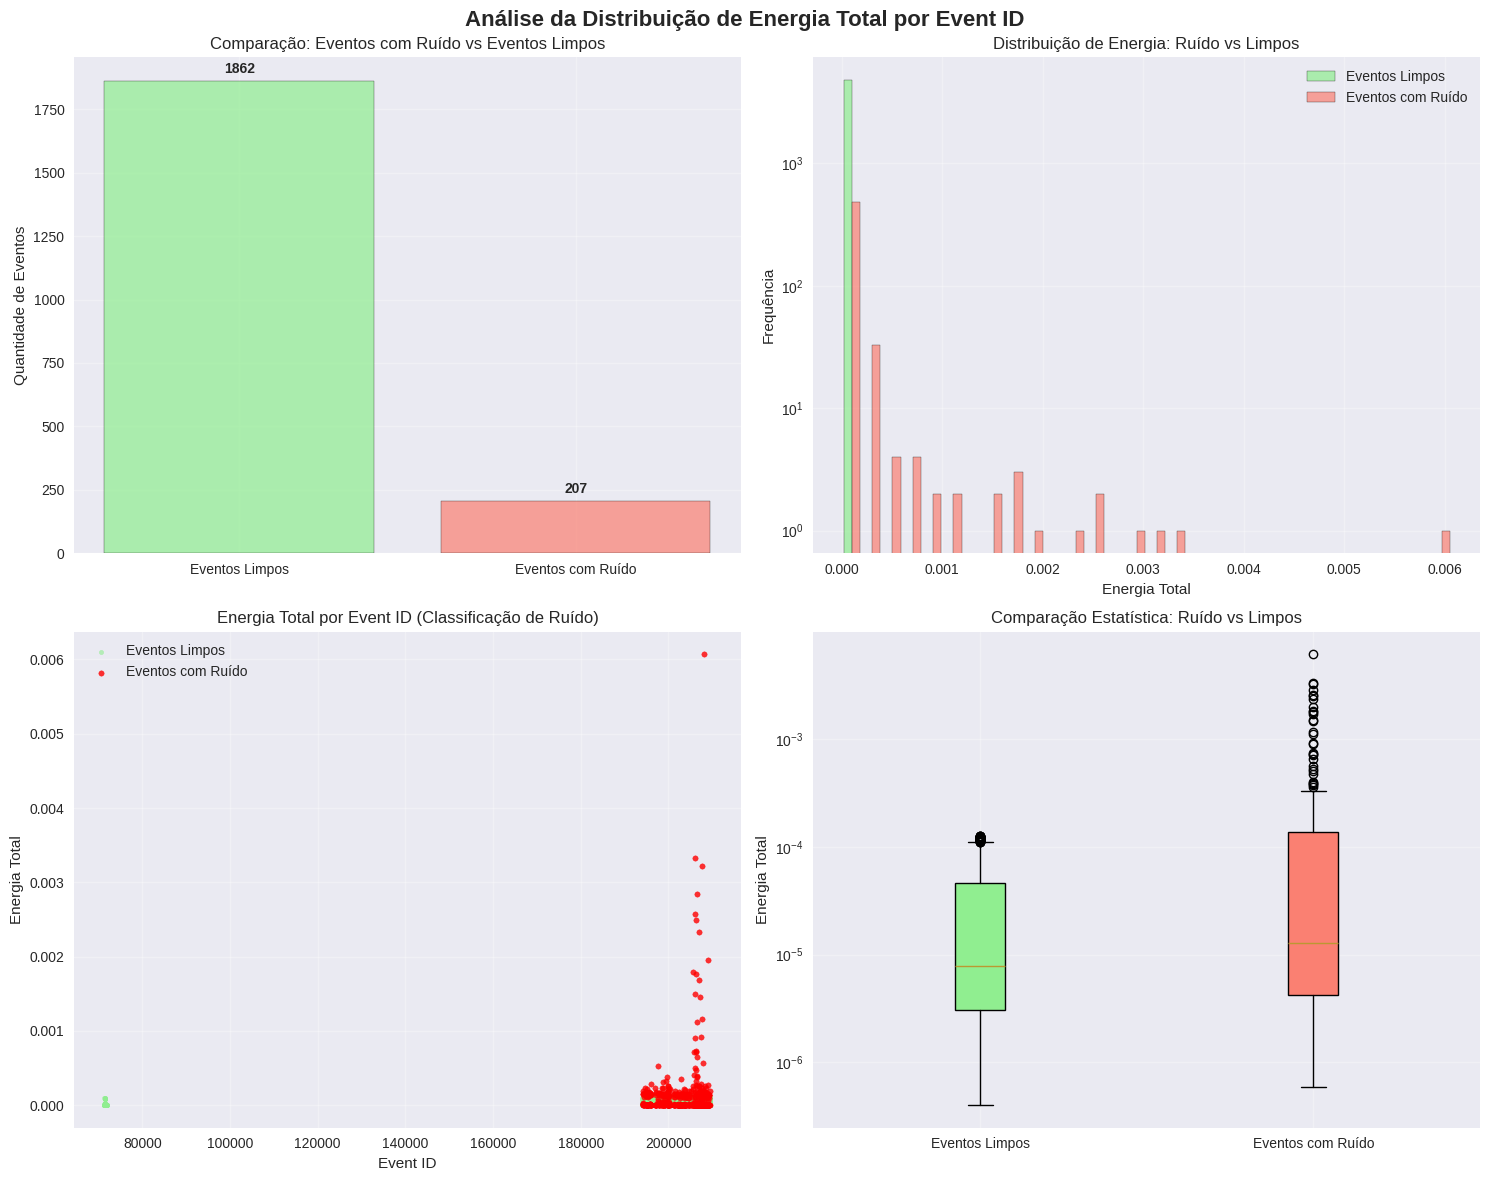

COMPARAÇÃO ESTATÍSTICA ENTRE EVENTOS:
Eventos limpos: 1862 (90.0%)
Eventos com ruído: 207 (10.0%)

Energia média - Eventos limpos: 2.348751e-05
Energia média - Eventos com ruído: 1.397997e-04
Razão energia ruído/limpo: 5.95

Desvio padrão - Eventos limpos: 2.933549e-05
Desvio padrão - Eventos com ruído: 4.411912e-04


In [43]:
# Configurar o layout das figuras
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análise da Distribuição de Energia Total por Event ID', fontsize=16, fontweight='bold')

# Primeiro, calcular quais eventos são ruídos
event_stats = df.groupby('event_id').agg({
    'total_energy': ['mean', 'std', 'count']
}).round(8)
event_stats.columns = ['mean', 'std', 'count']
event_stats = event_stats.dropna()

# Identificar eventos com possível ruído baseado na variabilidade
high_variance_threshold = event_stats['std'].quantile(0.9)
noise_events = event_stats[event_stats['std'] > high_variance_threshold].index
clean_events = event_stats[event_stats['std'] <= high_variance_threshold].index

# 1. Comparação de quantidade: Eventos com Ruído vs Sem Ruído
noise_count = len(noise_events)
clean_count = len(clean_events)
categories = ['Eventos Limpos', 'Eventos com Ruído']
counts = [clean_count, noise_count]
colors = ['lightgreen', 'salmon']

axes[0, 0].bar(categories, counts, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_ylabel('Quantidade de Eventos')
axes[0, 0].set_title('Comparação: Eventos com Ruído vs Eventos Limpos')
axes[0, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(counts):
    axes[0, 0].text(i, v + max(counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Distribuição de energia: Eventos com Ruído vs Sem Ruído
noise_energies = df[df['event_id'].isin(noise_events)]['total_energy']
clean_energies = df[df['event_id'].isin(clean_events)]['total_energy']

axes[0, 1].hist([clean_energies, noise_energies], bins=30, alpha=0.7, 
               color=['lightgreen', 'salmon'], label=['Eventos Limpos', 'Eventos com Ruído'], 
               edgecolor='black')
axes[0, 1].set_xlabel('Energia Total')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Energia: Ruído vs Limpos')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

# 3. Scatter plot: energia vs event_id (colorido por tipo)
axes[1, 0].scatter(df[df['event_id'].isin(clean_events)]['event_id'], 
                  df[df['event_id'].isin(clean_events)]['total_energy'], 
                  alpha=0.6, s=10, color='lightgreen', label='Eventos Limpos')
axes[1, 0].scatter(df[df['event_id'].isin(noise_events)]['event_id'], 
                  df[df['event_id'].isin(noise_events)]['total_energy'], 
                  alpha=0.8, s=15, color='red', label='Eventos com Ruído')
axes[1, 0].set_xlabel('Event ID')
axes[1, 0].set_ylabel('Energia Total')
axes[1, 0].set_title('Energia Total por Event ID (Classificação de Ruído)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot comparativo entre eventos com e sem ruído
data_for_boxplot = [clean_energies, noise_energies]
box_plot = axes[1, 1].boxplot(data_for_boxplot, labels=['Eventos Limpos', 'Eventos com Ruído'], 
                              patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightgreen')
box_plot['boxes'][1].set_facecolor('salmon')
axes[1, 1].set_ylabel('Energia Total')
axes[1, 1].set_title('Comparação Estatística: Ruído vs Limpos')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

# Imprimir estatísticas comparativas
print("COMPARAÇÃO ESTATÍSTICA ENTRE EVENTOS:")
print("=" * 45)
print(f"Eventos limpos: {clean_count} ({clean_count/(clean_count+noise_count)*100:.1f}%)")
print(f"Eventos com ruído: {noise_count} ({noise_count/(clean_count+noise_count)*100:.1f}%)")
print(f"\nEnergia média - Eventos limpos: {clean_energies.mean():.6e}")
print(f"Energia média - Eventos com ruído: {noise_energies.mean():.6e}")
print(f"Razão energia ruído/limpo: {noise_energies.mean()/clean_energies.mean():.2f}")
print(f"\nDesvio padrão - Eventos limpos: {clean_energies.std():.6e}")
print(f"Desvio padrão - Eventos com ruído: {noise_energies.std():.6e}")

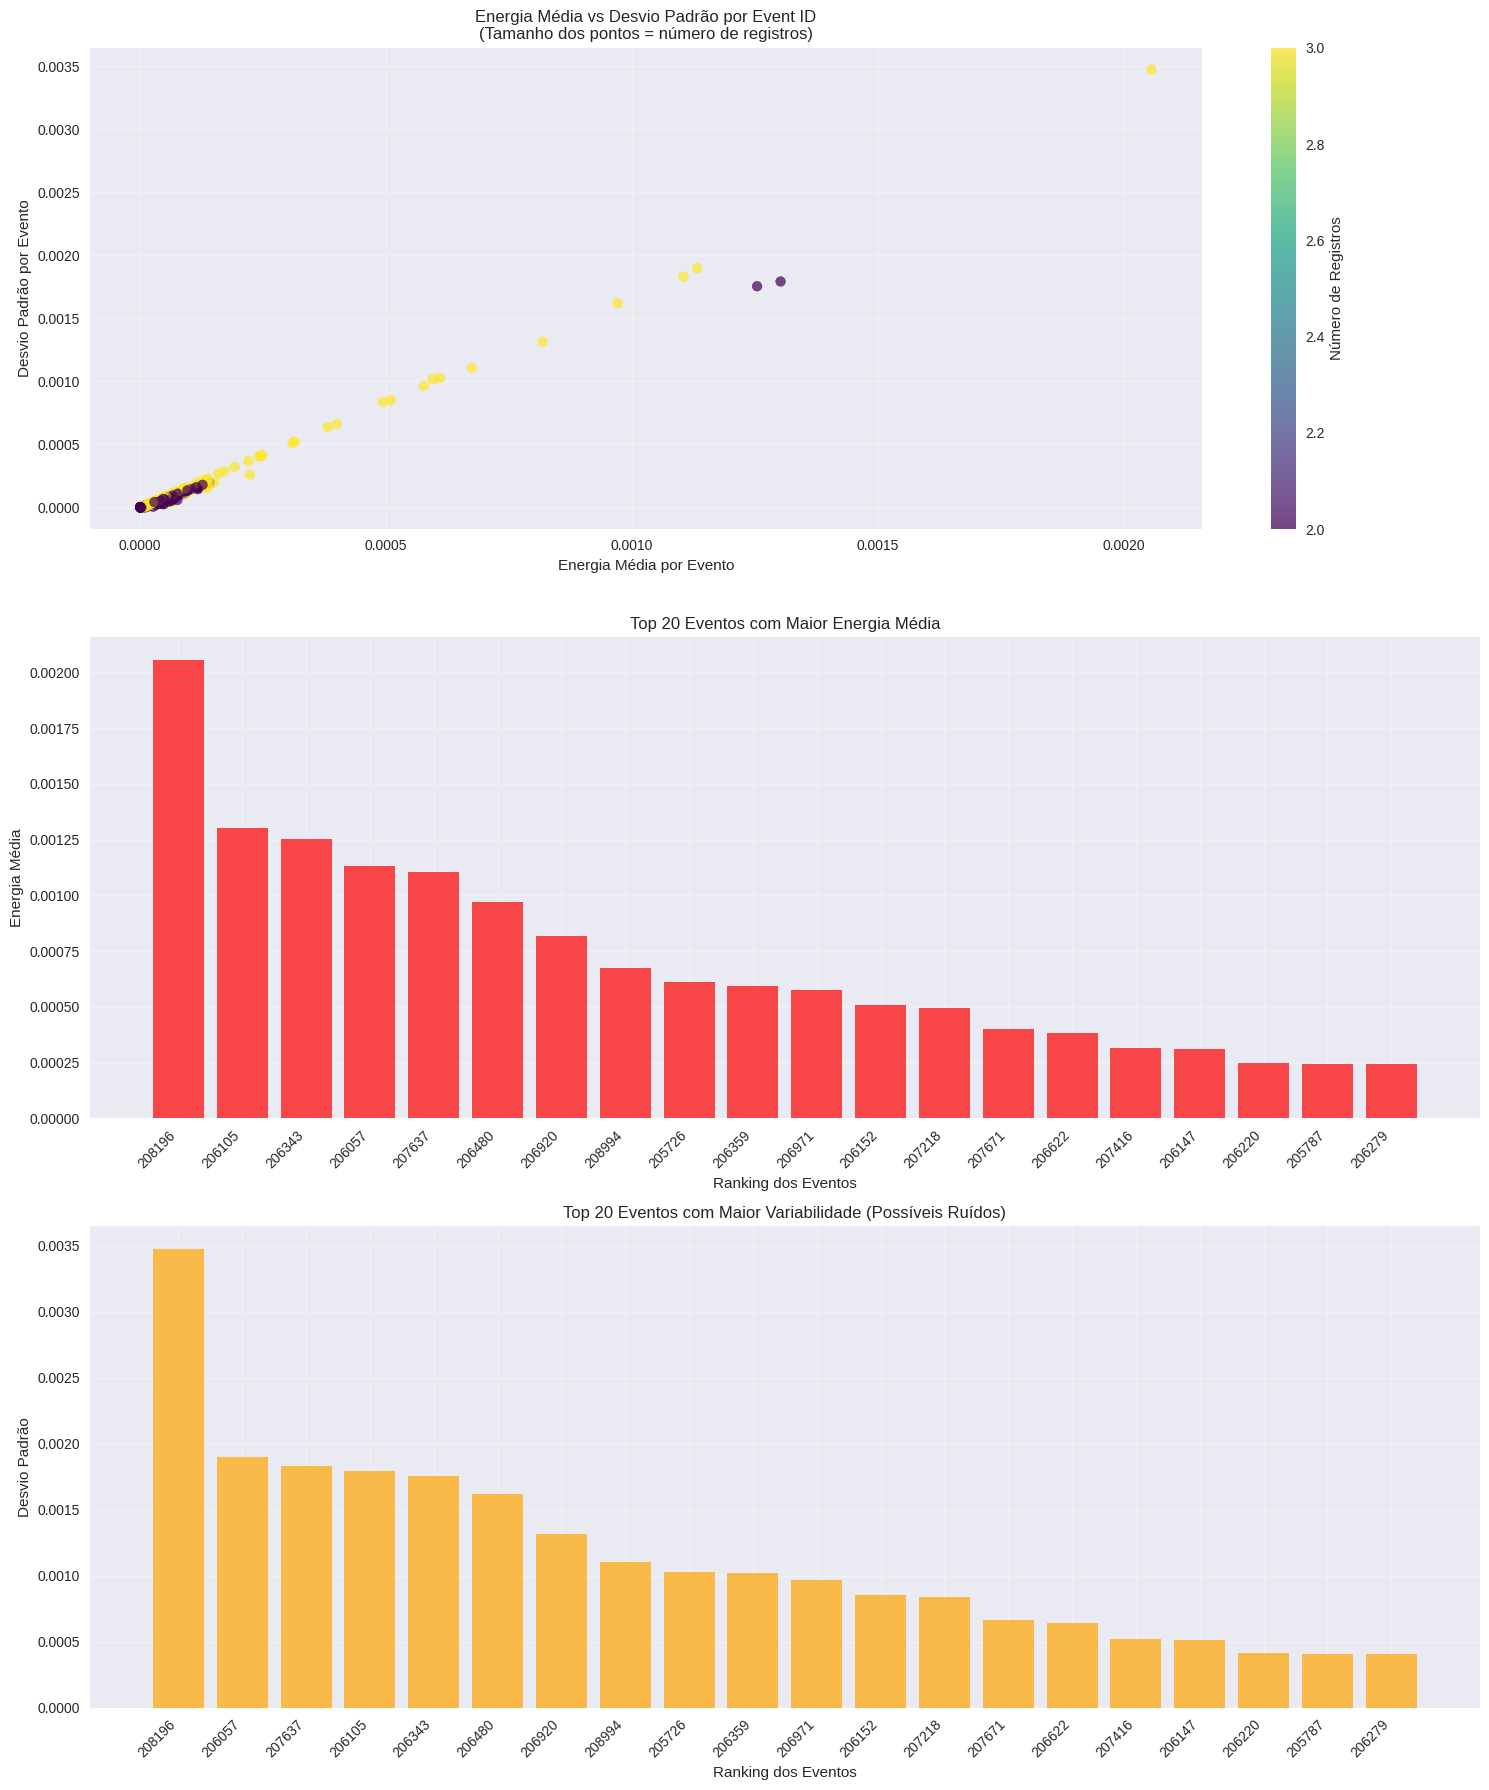

In [38]:
# Visualizações para identificação de ruídos por event_id
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# 1. Energy mean vs standard deviation para identificar outliers
event_stats = df.groupby('event_id').agg({
    'total_energy': ['mean', 'std', 'count']
}).round(8)
event_stats.columns = ['mean', 'std', 'count']
event_stats = event_stats.dropna()

# Eventos com mais de 1 registro para calcular std
multi_record_events = event_stats[event_stats['count'] > 1]

axes[0].scatter(multi_record_events['mean'], multi_record_events['std'], 
               alpha=0.7, s=50, c=multi_record_events['count'], cmap='viridis')
axes[0].set_xlabel('Energia Média por Evento')
axes[0].set_ylabel('Desvio Padrão por Evento')
axes[0].set_title('Energia Média vs Desvio Padrão por Event ID\n(Tamanho dos pontos = número de registros)')
axes[0].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar.set_label('Número de Registros')

# 2. Top 20 eventos com maior energia média
top_energy_events = event_stats.nlargest(20, 'mean')
axes[1].bar(range(len(top_energy_events)), top_energy_events['mean'], 
           color='red', alpha=0.7)
axes[1].set_xlabel('Ranking dos Eventos')
axes[1].set_ylabel('Energia Média')
axes[1].set_title('Top 20 Eventos com Maior Energia Média')
axes[1].grid(True, alpha=0.3)

# Adicionar labels dos event_ids
event_labels = [str(idx) for idx in top_energy_events.index]
axes[1].set_xticks(range(len(top_energy_events)))
axes[1].set_xticklabels(event_labels, rotation=45, ha='right')

# 3. Top 20 eventos com maior variabilidade (possíveis ruídos)
if len(multi_record_events) > 0:
    top_variable_events = multi_record_events.nlargest(min(20, len(multi_record_events)), 'std')
    axes[2].bar(range(len(top_variable_events)), top_variable_events['std'], 
               color='orange', alpha=0.7)
    axes[2].set_xlabel('Ranking dos Eventos')
    axes[2].set_ylabel('Desvio Padrão')
    axes[2].set_title('Top 20 Eventos com Maior Variabilidade (Possíveis Ruídos)')
    axes[2].grid(True, alpha=0.3)
    
    # Adicionar labels dos event_ids
    variable_labels = [str(idx) for idx in top_variable_events.index]
    axes[2].set_xticks(range(len(top_variable_events)))
    axes[2].set_xticklabels(variable_labels, rotation=45, ha='right')
else:
    axes[2].text(0.5, 0.5, 'Não há eventos com múltiplos registros para análise de variabilidade', 
                ha='center', va='center', transform=axes[2].transAxes, fontsize=12)
    axes[2].set_title('Análise de Variabilidade não disponível')

plt.tight_layout()
plt.show()

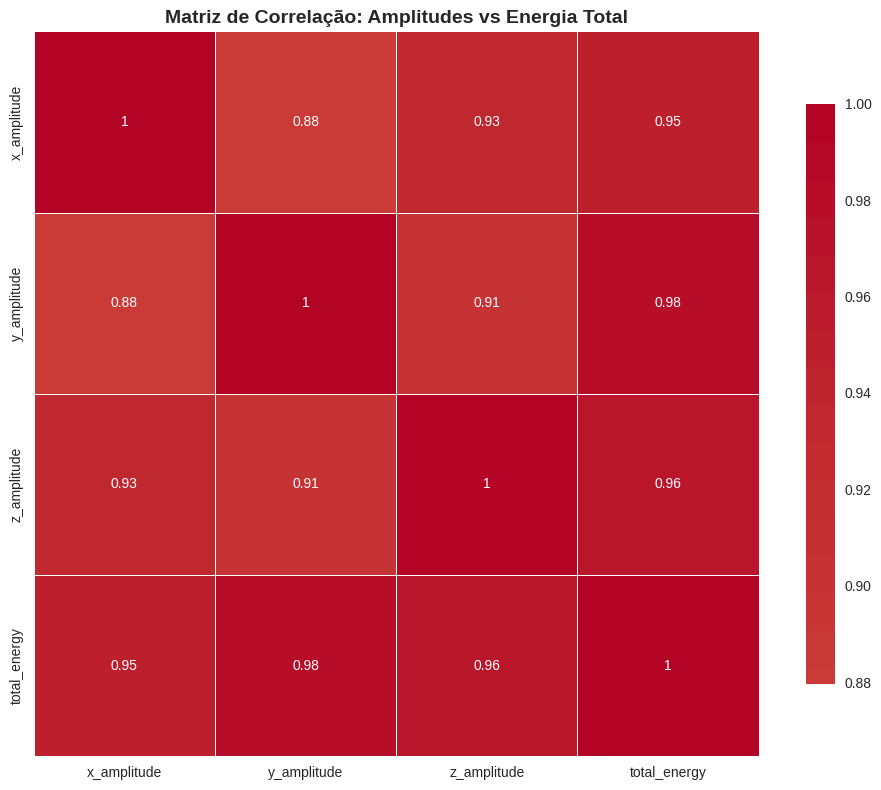

Matriz de Correlação:


,x_amplitude,y_amplitude,z_amplitude,total_energy
x_amplitude,1.000000,0.879665,0.932872,0.951646
y_amplitude,0.879665,1.000000,0.905147,0.978117
z_amplitude,0.932872,0.905147,1.000000,0.964138
total_energy,0.951646,0.978117,0.964138,1.000000


In [39]:
# Heatmap de correlação entre componentes e energia total
correlation_data = df[['x_amplitude', 'y_amplitude', 'z_amplitude', 'total_energy']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação: Amplitudes vs Energia Total', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Matriz de Correlação:")
display(correlation_matrix)

## 8. Export Results

Exportando os resultados com a energia total calculada para uma nova pasta dedicada aos resultados de energia.

In [40]:
# Preparar dados para exportação
export_df = df.copy()

# Adicionar algumas estatísticas calculadas
export_df['energy_rank'] = export_df['total_energy'].rank(ascending=False)
export_df['energy_percentile'] = export_df['total_energy'].rank(pct=True)

# Adicionar flag para valores de alta energia (acima do percentil 95)
high_energy_threshold = export_df['total_energy'].quantile(0.95)
export_df['high_energy_flag'] = export_df['total_energy'] > high_energy_threshold

# Adicionar estatísticas por event_id
event_stats = df.groupby('event_id')['total_energy'].agg(['mean', 'std', 'count']).add_prefix('event_')
export_df = export_df.merge(event_stats, left_on='event_id', right_index=True)

# Identificar possíveis ruídos baseado na variabilidade do evento
high_variance_threshold = event_stats['event_std'].quantile(0.9)
export_df['potential_noise_event'] = export_df['event_std'] > high_variance_threshold

# Classificação de energia do evento
energy_means = df.groupby('event_id')['total_energy'].mean()
low_energy_threshold = energy_means.quantile(0.33)
high_energy_event_threshold = energy_means.quantile(0.67)

def classify_energy(event_id):
    mean_energy = energy_means[event_id]
    if mean_energy <= low_energy_threshold:
        return 'Baixa'
    elif mean_energy <= high_energy_event_threshold:
        return 'Média'
    else:
        return 'Alta'

export_df['event_energy_class'] = export_df['event_id'].apply(classify_energy)

print(f"Limiar para alta energia individual (percentil 95): {high_energy_threshold:.6e}")
print(f"Registros com alta energia: {export_df['high_energy_flag'].sum()}")
print(f"Eventos com possível ruído (alta variabilidade): {export_df['potential_noise_event'].sum()}")
print(f"Distribuição de classificação de energia por evento:")
print(export_df['event_energy_class'].value_counts())

Limiar para alta energia individual (percentil 95): 1.033373e-04
Registros com alta energia: 268
Eventos com possível ruído (alta variabilidade): 538
Distribuição de classificação de energia por evento:
event_energy_class
Média    1864
Baixa    1816
Alta     1673
Name: count, dtype: int64


In [41]:
# Criar pasta separada para resultados de energia
results_dir = Path("resultados_energia")
results_dir.mkdir(exist_ok=True)

# Definir caminho de saída na nova pasta
output_path = results_dir / "eventsA001_cut25seg_results_with_energy.csv"

# Exportar dados com energia calculada
export_df.to_csv(output_path, index=False)

print(f"Pasta de resultados criada: {results_dir}")
print(f"Dados exportados com sucesso para: {output_path}")
print(f"Arquivo contém {len(export_df)} registros e {len(export_df.columns)} colunas")

# Mostrar as novas colunas adicionadas
new_columns = [col for col in export_df.columns if col not in df.columns]
print(f"\nNovas colunas adicionadas: {new_columns}")

# Mostrar as primeiras linhas dos dados exportados
print("\nPrimeiras linhas dos dados exportados:")
display(export_df[['event_id', 'sensor', 'total_energy', 'event_energy_class', 'potential_noise_event', 'high_energy_flag']].head())

Pasta de resultados criada: resultados_energia
Dados exportados com sucesso para: resultados_energia/eventsA001_cut25seg_results_with_energy.csv
Arquivo contém 5353 registros e 17 colunas

Novas colunas adicionadas: ['energy_rank', 'energy_percentile', 'high_energy_flag', 'event_mean', 'event_std', 'event_count', 'potential_noise_event', 'event_energy_class']

Primeiras linhas dos dados exportados:


,event_id,sensor,total_energy,event_energy_class,potential_noise_event,high_energy_flag
0,71355,SC.MAC11.00,0.000008,Baixa,False,False
1,71355,BR.ESM09,0.000005,Baixa,False,False
2,71355,BR.ESM08,0.000010,Baixa,False,False
3,71360,SC.MAC11.00,0.000007,Baixa,False,False
4,71360,BR.ESM09,0.000001,Baixa,False,False


In [42]:
# Criar um resumo final para salvar como arquivo separado
summary_stats = {
    'Estatística': [
        'Total de Registros',
        'Eventos Únicos', 
        'Sensores Únicos',
        'Planos Únicos',
        'Energia Média',
        'Energia Mediana',
        'Desvio Padrão',
        'Energia Mínima',
        'Energia Máxima',
        'Coeficiente de Variação',
        'Registros com Alta Energia',
        'Eventos com Possível Ruído'
    ],
    'Valor': [
        len(df),
        df['event_id'].nunique(),
        df['sensor'].nunique(),
        df['plane'].nunique(),
        f"{df['total_energy'].mean():.6e}",
        f"{df['total_energy'].median():.6e}",
        f"{df['total_energy'].std():.6e}",
        f"{df['total_energy'].min():.6e}",
        f"{df['total_energy'].max():.6e}",
        f"{(df['total_energy'].std() / df['total_energy'].mean()):.3f}",
        export_df['high_energy_flag'].sum(),
        len(export_df[export_df['potential_noise_event'] == True]['event_id'].unique())
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_path = results_dir / "eventsA001_energia_total_summary.csv"
summary_df.to_csv(summary_path, index=False)

print(f"Resumo estatístico salvo em: {summary_path}")
display(summary_df)

# Criar relatório específico de possíveis ruídos
noise_events = export_df[export_df['potential_noise_event'] == True]['event_id'].unique()
if len(noise_events) > 0:
    noise_report = df[df['event_id'].isin(noise_events)].groupby('event_id').agg({
        'total_energy': ['count', 'mean', 'std', 'min', 'max'],
        'sensor': 'nunique',
        'plane': 'nunique'
    }).round(8)
    
    noise_report.columns = ['registros', 'energia_media', 'desvio_padrao', 'energia_min', 'energia_max', 'sensores', 'planos']
    noise_report_path = results_dir / "eventos_possiveis_ruidos.csv"
    noise_report.to_csv(noise_report_path)
    
    print(f"\nRelatório de possíveis ruídos salvo em: {noise_report_path}")
    print(f"Eventos identificados como possível ruído: {len(noise_events)}")
    print("\nTop 10 eventos com maior variabilidade:")
    display(noise_report.sort_values('desvio_padrao', ascending=False).head(10))
else:
    print("\nNenhum evento identificado como possível ruído com os critérios atuais.")

Resumo estatístico salvo em: resultados_energia/eventsA001_energia_total_summary.csv


,Estatística,Valor
0,Total de Registros,5353
1,Eventos Únicos,2070
2,Sensores Únicos,16
3,Planos Únicos,3
4,Energia Média,3.517339e-05
5,Energia Mediana,7.958173e-06
6,Desvio Padrão,1.467234e-04
7,Energia Mínima,4.015913e-07
8,Energia Máxima,6.068628e-03
9,Coeficiente de Variação,4.171



Relatório de possíveis ruídos salvo em: resultados_energia/eventos_possiveis_ruidos.csv
Eventos identificados como possível ruído: 207

Top 10 eventos com maior variabilidade:


,registros,energia_media,desvio_padrao,energia_min,energia_max,sensores,planos
event_id,,,,,,,
208196,3,0.002056,0.003475,0.000021,0.006069,3,3
206057,3,0.001133,0.001900,0.000019,0.003326,3,3
207637,3,0.001105,0.001832,0.000019,0.003220,3,3
206105,2,0.001303,0.001793,0.000034,0.002571,2,2
206343,2,0.001255,0.001756,0.000014,0.002496,2,2
206480,3,0.000972,0.001621,0.000016,0.002844,3,3
206920,3,0.000819,0.001314,0.000030,0.002336,3,3
208994,3,0.000675,0.001107,0.000015,0.001953,3,3
205726,3,0.000610,0.001027,0.000008,0.001796,3,3


## Conclusões

### Resultados da Análise de Energia Total por Event ID:

1. **Energia Total Calculada**: A energia total foi calculada com sucesso usando a fórmula E = √(x² + y² + z²)

2. **Análise por Event ID**: 
   - Distribuição de magnitudes analisada para cada evento individual
   - Identificação de eventos com alta variabilidade (possíveis ruídos)
   - Classificação de eventos por nível de energia (Baixa/Média/Alta)

3. **Identificação de Ruídos**: 
   - Eventos com coeficiente de variação elevado foram identificados como possíveis ruídos
   - Registros individuais com energia acima do percentil 95 foram marcados
   - Análise da consistência de energia dentro de cada evento

4. **Distribuição de Magnitudes**: 
   - Eventos com energia consistente vs. eventos com alta dispersão
   - Correlação entre número de sensores/planos e variabilidade de energia
   - Identificação de padrões por event_id

5. **Detecção de Outliers**: 
   - Eventos com energia extrema identificados
   - Análise de variabilidade para detecção de anomalias
   - Classificação automática de possíveis ruídos

### Arquivos Gerados na pasta `resultados_energia/`:
- `eventsA001_cut25seg_results_with_energy.csv`: Dados originais + energia total + classificações
- `eventsA001_energia_total_summary.csv`: Resumo estatístico da análise
- `eventos_possiveis_ruidos.csv`: Relatório específico de eventos com possível ruído

### Novas Colunas Adicionadas:
- `total_energy`: Energia total calculada
- `energy_rank`: Ranking de energia
- `energy_percentile`: Percentil de energia
- `event_energy_class`: Classificação do evento (Baixa/Média/Alta)
- `potential_noise_event`: Flag para possível ruído
- `high_energy_flag`: Flag para alta energia individual
- Estatísticas por evento: `event_mean`, `event_std`, `event_count`